<a href="https://colab.research.google.com/github/dmtrung14/pyTorch_fundamentals/blob/main/PyTorch_Fundamentals_Computer_Vision_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision and Convolutional Neural Networks With PyTorch

## 0. Computer vision libraries in PyTorch

* `torchvision` - base domain library for torch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision
* `torchvision.models` -get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data to be suitable for use with an ML model
* `torch.utils.data.Dataset` - base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Create a Python iterable over a dataset

In [1]:
# Import torch
import torch
from torch import nn

# Import Torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor


# Import Matplotlib
import matplotlib.pyplot as plt

## 1. Getting a dataset

We will be using the FashionMNIST dataset from `torchvision.datasets`

In [2]:
#Setup training data
from torchvision import datasets
train_data= datasets.FashionMNIST(
    root = 'data', # Where do we want to download to
    train = True, # do we want the training dataset
    download = True, # do we want to download yes/no?
    transform = torchvision.transforms.ToTensor(),
    target_transform = None #how do we want to transform the labels/targets
)

test_data = datasets.FashionMNIST(
        root = 'data', 
        train = False,
        download = True,
        transform = torchvision.transforms.ToTensor(),
        target_transform = None
    )

100%|██████████| 26421880/26421880 [00:03<00:00, 8236662.67it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 140717.42it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2641973.60it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 19827618.91it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label = train_data[0]

In [5]:
class_names = train_data.classes
class_names, train_data.class_to_idx, train_data.targets

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 {'T-shirt/top': 0,
  'Trouser': 1,
  'Pullover': 2,
  'Dress': 3,
  'Coat': 4,
  'Sandal': 5,
  'Shirt': 6,
  'Sneaker': 7,
  'Bag': 8,
  'Ankle boot': 9},
 tensor([9, 0, 0,  ..., 3, 0, 5]))

In [6]:
image.shape, label
print(f"{image.shape} -> [color_chanel, H, W]")

torch.Size([1, 28, 28]) -> [color_chanel, H, W]


### Visualizing our data

In [7]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

Image shaep : torch.Size([1, 28, 28])


(<matplotlib.image.AxesImage at 0x7f2dde50f130>,
 <matplotlib.image.AxesImage at 0x7f2dde3c80a0>)

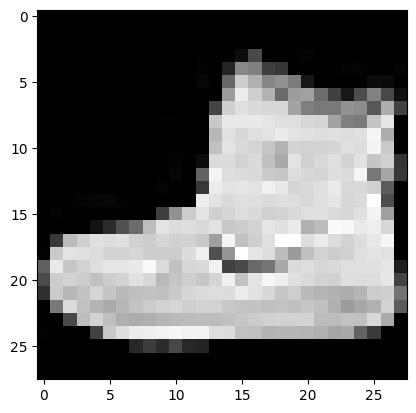

In [8]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shaep : {image.shape}")
plt.imshow(image.squeeze()), plt.imshow(image.squeeze(), cmap = 'gray')

In [9]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

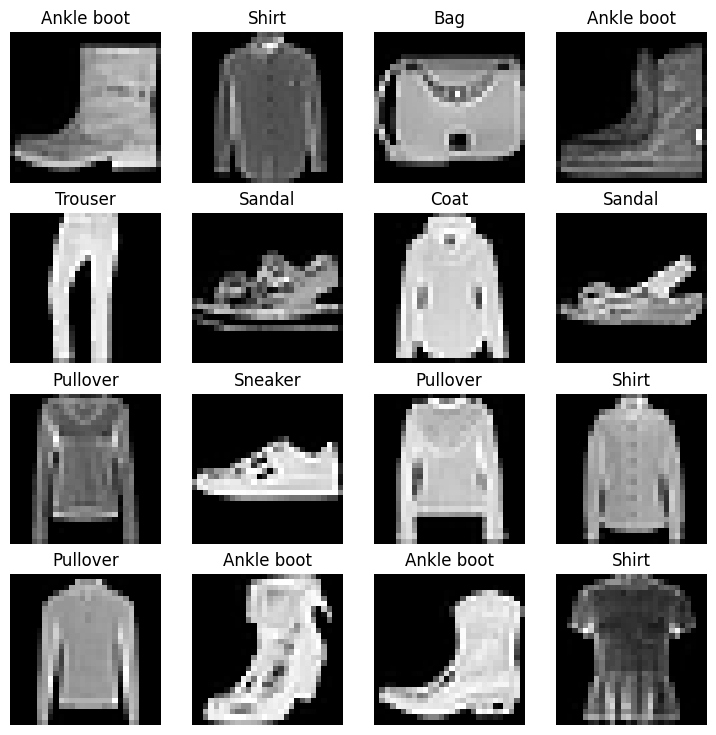

In [10]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

### ❓ Do you think these items of clothing (images) could be modelled with pure linear lines or do you think we'll need non-linearities

## Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets, `DataLoader` turns our datast into a Python iterable.

More specifically, we want to turn our dataset into batches (or mini-batches)

Why would we do this?

1. It is more computationally efficient, as in your computing hardware may not be able to look at 60,000 images in one hit. So we break it down to 32 images at  atime (batch size of 32). 

2. It gives our nerual network more chances to update its gradietns per epoch.

For more on mini-batches see Andrew Ng's video on YouTube

In [11]:

from torch.utils.data import DataLoader

# Set up the batch size hyperparameter

BATCH_SIZE = 32

# Turn datasets into iterables (batches)

train_dataloader = DataLoader(dataset = train_data, 
                              batch_size= BATCH_SIZE, 
                              shuffle = True)
test_dataloader = DataLoader(dataset = test_data, 
                             batch_size = BATCH_SIZE,
                             shuffle = False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f2ddbf2ba60>,
 <torch.utils.data.dataloader.DataLoader at 0x7f2ddbf28c40>)

In [12]:
# Let's check out what we've created

print(f'Dataloaders: {train_dataloader, test_dataloader}')
print(f'length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}')

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f2ddbf2ba60>, <torch.utils.data.dataloader.DataLoader object at 0x7f2ddbf28c40>)
length of train_dataloader: 1875 batches of 32


In [13]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

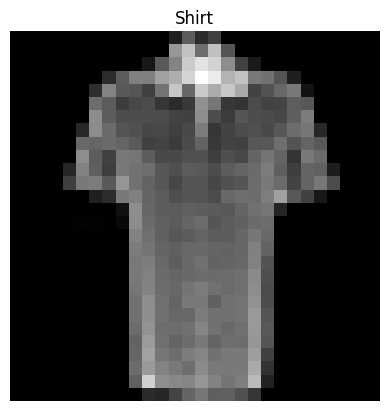

In [14]:
# Show a sample

torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap = 'gray')
plt.title(class_names[label])
plt.axis(False)

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments

In other wrods: start simply and add complexity when necessary.

In [15]:
# Create a flatten layer

flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x).squeeze()
x.shape, output.shape

(torch.Size([1, 28, 28]), torch.Size([784]))

In [16]:
from torch import nn
class FashioMNISTModelV0(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features = hidden_units),
        nn.Linear(in_features = hidden_units, out_features = output_shape),
    )
  
  def forward(self, x):
    return self.layers(x)

device = "cpu"

In [17]:
torch.manual_seed(42)

# Set up model with input parameters

model_0 = FashioMNISTModelV0(input_shape = 784,
                             hidden_units = 10, 
                             output_shape = len(class_names))
model_0.to(device)

model_0

FashioMNISTModelV0(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [18]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### Creating Loss Function and Optimizer

In [19]:
model_0.state_dict()

OrderedDict([('layers.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layers.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layers.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.3130, -0.0118,


#### Set up loss, optimizer, and evaluation metrics

* Use Cross Entropy Loss function
* SGD optimizer
* Evaluation metrics: accuracy

In [20]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

In [21]:
# We can also import the accuracy functions
import requests
from pathlib import Path

URL = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"


if Path("helper_function.py").is_file():
  print("already exists")
else:
  print("downloading helper_function.py")
  request = requests.get(URL)
  with open("helper_function.py", "wb") as f:
    f.write(request.content)

downloading helper_function.py


In [22]:
# Import accuracy metric
from helper_function import accuracy_fn

### Creating a function to time our experiments

Machine Learning is very experimental.

Two of the main things you'll often want to track are:
1. Mode's performance (loss and accuracy values etc)

2. How fast it runs

In [23]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):

  """ Prints diference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time: .3f} seconds")
  return total_time

start = timer()
end = timer()
print_train_time(start, end, device)


Train time on cpu:  0.000 seconds


4.637999995793507e-05

### Creating a training loop and training a model on batches of data

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss *per batch*

3. Loop through testing batches, perform testing steps, calcualte the test loss *per batch*

4. Print out what's happening
5. Time it all (for fun) ?

In [24]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
torch.cuda.manual_seed(42)

start_cpu = timer()

# Set the number of epochs
epochs = 3

# Create training and test loop

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n ===============")
  train_loss = 0

  # add a loop to loop through the training batches
  for batch, (x, y) in enumerate(train_dataloader):
    model_0.train()

    #1. Forward pass
    y_pred = model_0(x)

    #2. calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss

    #3. optimizer zero grad
    optimizer.zero_grad()

    #4. loss backwards
    loss.backward()

    #5. optimizer step
    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(x)}/{len(train_dataloader.dataset)} samples")
  
  # divide total train_loss by length of train dataloader
  train_loss /= len(train_dataloader)


  # Testing loop
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for x_test ,y_test in test_dataloader:
      # forward pass
      test_pred = model_0(x_test)

      #caculate the loss
      test_loss += loss_fn(test_pred, y_test)

      # calculate the accuracy
      test_acc += accuracy_fn(y_test, test_pred.argmax(dim = 1))
    
    # calculate the test_loss average per batch

    test_loss /= len(test_dataloader)

    # calculate the test acc per batch
    test_acc /= len(test_dataloader)
  
  # print what's happening
  print(f'\n Train loss: {train_loss: .4f} | Test loss: {test_loss: .4f} | Test_acc: {test_acc: .4f}')


#Calculate the training time
end_cpu = timer()
total_train_time_model_0 = print_train_time(start_cpu, end_cpu,device=str(next(model_0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

 Train loss:  0.5904 | Test loss:  0.5095 | Test_acc:  82.0387
Epoch: 1 
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

 Train loss:  0.4763 | Test loss:  0.4799 | Test_acc:  83.1969
Epoch: 2 
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

 Train loss:  0.4550 | Test loss:  0.4766 | Test_acc:  83.4265
Train time on cpu:  57.089 seconds


### 4. Make predictions and get Model 0 results

In [25]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for x,y in data_loader:
      y_pred = model(x)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y, y_pred.argmax(dim = 1))

    # Scale loss and acc to find the avr loss and acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)
  
  return {"Model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}
  
# Calculate model 0 results on test dataset

model_0_result = eval_model(model = model_0,
                              data_loader = test_dataloader,
                              loss_fn = loss_fn,
                              accuracy_fn = accuracy_fn)
model_0_result


{'Model_name': 'FashioMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

### 5. Setup device agnostic code

To use GPU to train our model and compare the training time with our cpu based model 

In [26]:
device = "cuda" if torch.cuda.is_available() else "cpu"

Let's try to build  a model with non-linear functions and GPU on our own

In [27]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_features, hidden_units, output_features):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_features)
    )
  
  def forward(self, x):
    return self.layers(x)

model_1 = FashionMNISTModelV1(input_features = 28 *28,
                              hidden_units = 10,
                              output_features = len(class_names)).to(device)
model_1

FashionMNISTModelV1(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [28]:
# Now set up the loss function, optimizer and the evaluation metrics
from helper_function import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(),
                            lr = 0.05)

In [29]:
# Build a training loop
from tqdm.auto import tqdm
from timeit import default_timer as timer

torch.manual_seed(42)
torch.cuda.manual_seed(42)

begin = timer()

# send the datas to the device?


# Set epoch:
epochs = 3

# Now comes the training loop:
for epoch in tqdm(range(epochs)):
  # Set model to train mode
  model_1.train()

  # Set up the accumulating training loss:
  train_loss = 0

  # Now iterate through the batches
  for batch, (x,y) in enumerate(train_dataloader):
    x, y = x.to(device), y.to(device)
    # make the forward pass
    y_pred = model_1(x)

    # calculate the loss:
    loss = loss_fn(y_pred, y)
    acc = accuracy_fn(y_pred.argmax(dim = 1), y)
    train_loss += loss

    # optimizer zero grad
    optimizer.zero_grad()

    # backpropagation
    loss.backward()

    # gradient descent
    optimizer.step()

    #Print out what's happening in the training:
    if batch %400 == 0:
      print(f'Batch number: {batch}/{len(train_dataloader)} | loss : {loss: .4f} | acc: {acc: .4f}')
  
  train_loss /= len(train_dataloader)

  # Set up the testing loop
  test_loss, test_acc = 0, 0
  model_1.eval()
  with torch.inference_mode():
    for x_test,y_test in test_dataloader:
      x_test, y_test = x_test.to(device), y_test.to(device)
      y_test_pred = model_1(x_test)
      test_loss += loss_fn(y_test_pred, y_test)
      test_acc += accuracy_fn(y_test_pred.argmax(dim = 1), y_test)
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
  # Print out what's happening
  print(f'Epoch: {epoch + 1}/{epochs}| train_loss: {train_loss: .4f} | test_loss: {test_loss:.4f} | test_acc: { test_acc: .4f}')

end = timer()
print(f'Training Time = {begin-end: .3f} seconds')



  0%|          | 0/3 [00:00<?, ?it/s]

Batch number: 0/1875 | loss :  2.2915 | acc:  6.2500
Batch number: 400/1875 | loss :  0.8096 | acc:  62.5000
Batch number: 800/1875 | loss :  0.7055 | acc:  71.8750
Batch number: 1200/1875 | loss :  0.4086 | acc:  87.5000
Batch number: 1600/1875 | loss :  0.4366 | acc:  84.3750
Epoch: 1/3| train_loss:  0.7030 | test_loss: 0.5235 | test_acc:  81.4896
Batch number: 0/1875 | loss :  0.4130 | acc:  87.5000
Batch number: 400/1875 | loss :  0.6933 | acc:  71.8750
Batch number: 800/1875 | loss :  0.4659 | acc:  84.3750
Batch number: 1200/1875 | loss :  0.5393 | acc:  81.2500
Batch number: 1600/1875 | loss :  0.2792 | acc:  93.7500
Epoch: 2/3| train_loss:  0.4814 | test_loss: 0.4813 | test_acc:  83.1470
Batch number: 0/1875 | loss :  0.3100 | acc:  87.5000
Batch number: 400/1875 | loss :  0.7729 | acc:  78.1250
Batch number: 800/1875 | loss :  0.2752 | acc:  87.5000
Batch number: 1200/1875 | loss :  0.4059 | acc:  87.5000
Batch number: 1600/1875 | loss :  0.3605 | acc:  90.6250
Epoch: 3/3| tra

### Hooray! We successfully built a CV model on our own and it passed ✅

## Functionizing training and evaluation/testing loops

In [30]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device):
  model.train()

  # Set up the accumulating training loss:
  train_loss = 0

  # Now iterate through the batches
  for batch, (x,y) in enumerate(dataloader):
    x, y = x.to(device), y.to(device)
    # make the forward pass
    y_pred = model(x)

    # calculate the loss:
    loss = loss_fn(y_pred, y)
    acc = accuracy_fn(y_pred.argmax(dim = 1), y)
    train_loss += loss

    # optimizer zero grad
    optimizer.zero_grad()

    # backpropagation
    loss.backward()

    # gradient descent
    optimizer.step()

    #Print out what's happening in the training:
    if batch %400 == 0:
      print(f'Batch number: {batch}/{len(dataloader)} | loss : {loss: .4f} | acc: {acc: .4f}')
  
  train_loss /= len(dataloader)

In [31]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for x, y in dataloader:
      x, y = x.to(device), y.to(device)

      test_pred = model(x)

      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y, test_pred.argmax(dim = 1))

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    print(f"Test loss: {test_loss: .4f} | Test Acc: {test_acc: .4f}")

In [32]:
torch.manual_seed(42)

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n =================")
  train_step(model_1, train_dataloader, loss_fn, optimizer, accuracy_fn, device)
  test_step(model_1, test_dataloader, loss_fn, accuracy_fn, device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
Batch number: 0/1875 | loss :  0.2884 | acc:  90.6250
Batch number: 400/1875 | loss :  0.3585 | acc:  90.6250
Batch number: 800/1875 | loss :  0.3945 | acc:  84.3750
Batch number: 1200/1875 | loss :  0.2457 | acc:  90.6250
Batch number: 1600/1875 | loss :  0.2952 | acc:  87.5000
Test loss:  0.4632 | Test Acc:  83.5064
Epoch: 1 
Batch number: 0/1875 | loss :  0.3580 | acc:  87.5000
Batch number: 400/1875 | loss :  0.6233 | acc:  81.2500
Batch number: 800/1875 | loss :  0.3626 | acc:  90.6250
Batch number: 1200/1875 | loss :  0.4704 | acc:  84.3750
Batch number: 1600/1875 | loss :  0.2292 | acc:  90.6250
Test loss:  0.4573 | Test Acc:  83.9657
Epoch: 2 
Batch number: 0/1875 | loss :  0.3076 | acc:  90.6250
Batch number: 400/1875 | loss :  0.7677 | acc:  71.8750
Batch number: 800/1875 | loss :  0.2191 | acc:  90.6250
Batch number: 1200/1875 | loss :  0.4127 | acc:  87.5000
Batch number: 1600/1875 | loss :  0.3729 | acc:  84.3750
Test loss:  0.4376 | Test Acc:  84.5847


**Note:** Sometime, depending on your data/hardware you might find that your model trains faster on CPU than GPU.

Why?

1. It could be that the overhead for copying data/model to and from the GPU outweights the compute benefits offered by the GPU

2. The hardware Google Colab offers has better CPU than GPU

## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known Convolutional Networks

CNN's are known for their capabilities to find patterns in visual data

To find out more visit: https://poloclub.github.io/cnn-explainer/

In [105]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units, 
                  kernel_size = 3,
                  stride = 1,
                  padding = 1), # values we can set ourselves in our NN's are called hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, 
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride =1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels= hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, 
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride =1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*7*7,
                  out_features = output_shape)
    )
  
  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    return x
    

In [106]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape = 1, 
                              hidden_units = 10, 
                              output_shape= len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

###7.2  Stepping through `nn.Conv2d`

In [107]:
torch.manual_seed(42)

#create a batch of images
images= torch.randn(size = (32, 3, 64,64))
test_image = images[0]

print(f"Image batch shape: {image.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image: {test_image}")

Image batch shape: torch.Size([1, 28, 28])
Single image shape: torch.Size([3, 64, 64])
Test image: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978

In [108]:
# Create a single conv2d layer
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels = 3, 
                       out_channels = 10,
                       kernel_size = 3, #size of filter, here we get a 3x3 filter
                       stride = 1, # how big of each step in terms of pixels (both vertically and horizontally)
                       padding = 0) # adding the border so we don't lose data on the edges
test_image.unsqueeze(0)
conv_output = conv_layer(test_image)
conv_output

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

### 7.3 Stepping through `nn.MaxPool2d()`

In [109]:
test_image.shape

torch.Size([3, 64, 64])

In [110]:
print(f"test image original shape: {test_image.shape}")
print(f"test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sampel nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size = 2)
test_image_through_conv = conv_layer(test_image.unsqueeze(dim = 0))
print(f"Shape after going through conv layer : {test_image_through_conv.shape}")

# pass data through conv and maxpool
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Final shape: {test_image_through_conv_and_max_pool.shape}")

test image original shape: torch.Size([3, 64, 64])
test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv layer : torch.Size([1, 10, 62, 62])
Final shape: torch.Size([1, 10, 31, 31])


In [111]:
torch.manual_seed(42)

#Create a random tesnor with a similar number of dimensions to our images
random_tensor = torch.randn(size = (1,1,2,2))
random_tensor
print(f"random tensor: {random_tensor}")

# Create a max_pool_tensor
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

# Pass the random tensor throuhg the maxpool layer

max_pool_tensor = max_pool_layer(random_tensor)
print(f"Maxpool tensor: {max_pool_tensor}")
print(f"Maxpol tesnor shape: {max_pool_tensor.shape}")

random tensor: tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Maxpool tensor: tensor([[[[0.3367]]]])
Maxpol tesnor shape: torch.Size([1, 1, 1, 1])


(<matplotlib.image.AxesImage at 0x7f2db9722c20>, torch.Size([1, 28, 28]))

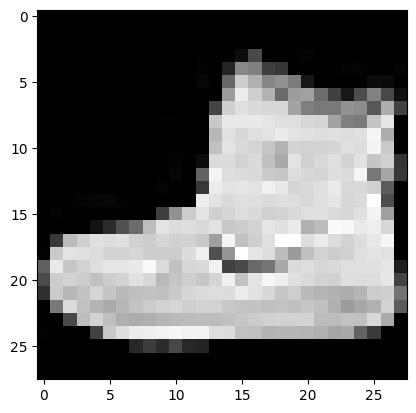

In [112]:
plt.imshow(image.squeeze(), cmap = "gray"), image.shape

In [113]:
rand_image_tensor = torch.randn(size = (1,28,28))
rand_image_tensor.shape
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0424, -0.0839,  0.0839, -0.0463,  0.0053,  0.0437,  0.0025,  0.0108,
         -0.0158, -0.0177]], device='cuda:0', grad_fn=<AddmmBackward0>)

### Setting up evaluation functions

In [114]:
# Set up loss function/eval metrics/optimizer
from helper_function import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.1)

### Train our first CNN 🏃

In [119]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# measure time
from timeit import default_timer as timer
start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n =============")
  train_step(model = model_2,
             dataloader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)
  test_step(model = model_2, 
            dataloader = train_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device
            )
end_model_2  = timer()
print(f"Train Time: {end_model_2 - start_model_2}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
Batch number: 0/1875 | loss :  0.3464 | acc:  90.6250
Batch number: 400/1875 | loss :  0.2615 | acc:  93.7500
Batch number: 800/1875 | loss :  0.1600 | acc:  93.7500
Batch number: 1200/1875 | loss :  0.1398 | acc:  96.8750
Batch number: 1600/1875 | loss :  0.1492 | acc:  90.6250
Test loss:  0.2716 | Test Acc:  90.2750
Epoch: 1 
Batch number: 0/1875 | loss :  0.1983 | acc:  93.7500
Batch number: 400/1875 | loss :  0.4392 | acc:  81.2500
Batch number: 800/1875 | loss :  0.2817 | acc:  90.6250
Batch number: 1200/1875 | loss :  0.1227 | acc:  93.7500
Batch number: 1600/1875 | loss :  0.2706 | acc:  87.5000
Test loss:  0.2717 | Test Acc:  90.1883
Epoch: 2 
Batch number: 0/1875 | loss :  0.3337 | acc:  90.6250
Batch number: 400/1875 | loss :  0.1897 | acc:  90.6250
Batch number: 800/1875 | loss :  0.2406 | acc:  87.5000
Batch number: 1200/1875 | loss :  0.2725 | acc:  87.5000
Batch number: 1600/1875 | loss :  0.1839 | acc:  93.7500
Test loss:  0.2510 | Test Acc:  90.9617
Train Time

### Compare model results and training time ✅

### Make and evaluate random predictions with best model

In [126]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

(torch.Size([1, 28, 28]), <matplotlib.image.AxesImage at 0x7f2db857d300>)

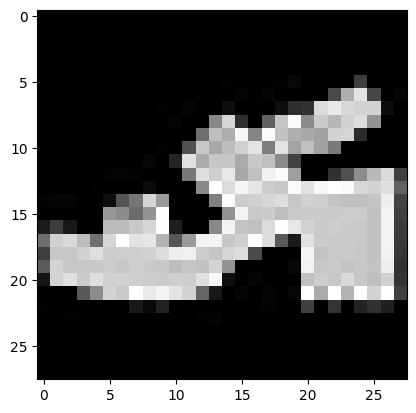

In [127]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k = 9):
  test_samples.append(sample)
  test_labels.append(label)
test_samples[0].shape, plt.imshow(test_samples[0].squeeze(), cmap = 'gray')

In [128]:
# Make predictions
pred_probs = make_predictions(model = model_2, 
                              data = test_samples)
pred_probs[:2]

tensor([[8.7815e-09, 4.8426e-10, 1.9965e-10, 6.9109e-10, 9.0537e-11, 9.9996e-01,
         6.0108e-10, 3.2082e-07, 3.8747e-06, 3.5670e-05],
        [8.6615e-03, 9.2440e-01, 5.3191e-04, 6.1126e-02, 8.7887e-04, 1.8298e-05,
         4.3365e-03, 1.3046e-05, 1.8337e-05, 1.5590e-05]])

In [130]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim =1)
pred_classes

tensor([5, 1, 7, 2, 3, 0, 4, 7, 1])

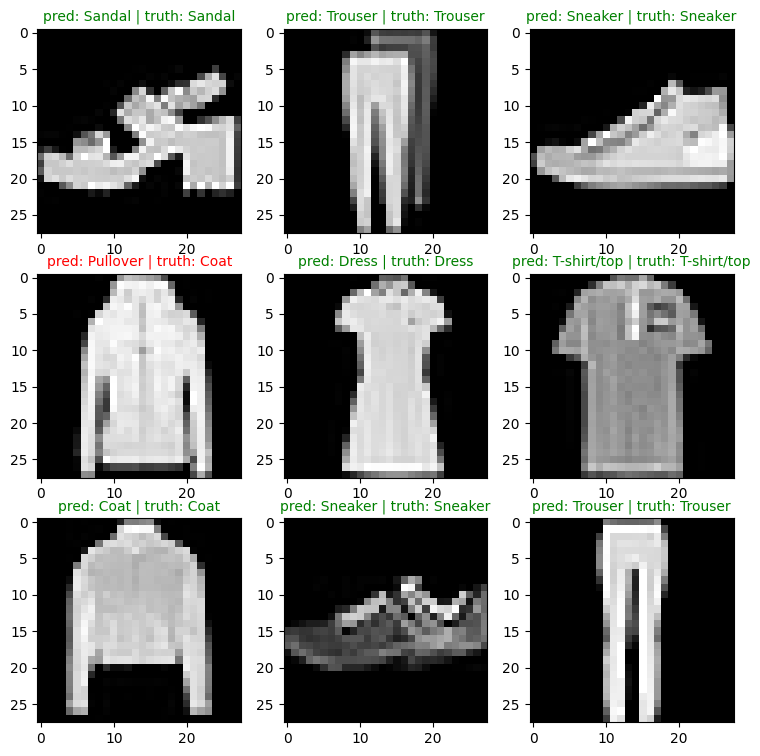

In [131]:
plt.figure(figsize = (9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)

  plt.imshow(sample.squeeze(), cmap = "gray")

  pred_label = class_names[pred_classes[i]]

  truth_label = class_names[test_labels[i]]

  #Create a title for the plot
  title_text = f"pred: {pred_label} | truth: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize = 10, c = "g")
  else:
    plt.title(title_text, fontsize = 10, c = "r")